In [1]:
import pandas as pd
from pathlib import Path
import datetime as dt
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import main dataset
ev_df = pd.read_csv(Path("../../../../data/processed_data/ev_main_dataset.csv"))

In [3]:
#Examine Data
print("Shape:",ev_df.shape)
display(ev_df.columns)
display(ev_df.head(10))

Shape: (2011, 10)


Index(['year', 'state', 'county', 'zip_codes', 'population',
       'ev_registrations', 'cumulative_ev_stations', 'median_income',
       'ev_adoption_rate', 'ev_growth_rate'],
      dtype='object')

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2010,CA,Alameda County,"[94501, 94502, 94536, 94537, 94538, 94539, 945...",1512986,20,0,69384,0.000013,NaN
1,2010,CA,Amador County,"[95601, 95629, 95640, 95642, 95654, 95665, 956...",37886,1,1,54758,0.000026,NaN
2,2010,CA,Contra Costa County,"[94505, 94506, 94507, 94509, 94511, 94513, 945...",1052540,10,0,78385,0.000010,NaN
3,2010,CA,Fresno County,"[93210, 93234, 93242, 93602, 93605, 93606, 936...",932039,2,0,46430,0.000002,NaN
4,2010,CA,Humboldt County,"[95501, 95502, 95503, 95511, 95514, 95518, 955...",135009,2,0,40089,0.000015,NaN
5,2010,CA,Kern County,"[93203, 93205, 93206, 93215, 93216, 93220, 932...",840996,1,0,47089,0.000001,NaN
6,2010,CA,Lake County,"[95422, 95423, 95424, 95426, 95435, 95443, 954...",64735,1,0,39491,0.000015,NaN
7,2010,CA,Los Angeles County,"[90001, 90002, 90003, 90004, 90005, 90006, 900...",9823246,360,21,55476,0.000037,NaN
8,2010,CA,Marin County,"[94901, 94903, 94904, 94912, 94913, 94914, 949...",252904,15,0,89268,0.000059,NaN
9,2010,CA,Monterey County,"[93426, 93450, 93901, 93902, 93905, 93906, 939...",416373,1,0,59271,0.000002,NaN


In [4]:
#Pull only Texas values
tx_df = ev_df[ev_df["state"] == "TX"].sort_values(["year","state","county"]).reset_index(drop=True)

tx_df.head(10)

,year,state,county,zip_codes,population,ev_registrations,cumulative_ev_stations,median_income,ev_adoption_rate,ev_growth_rate
0,2017,TX,Anderson County,"[75763, 75779, 75801, 75802, 75803, 75832, 758...",58175,1,0,42313,0.000017,NaN
1,2017,TX,Andrews County,[79714],17603,1,0,70753,0.000057,NaN
2,2017,TX,Angelina County,"[75901, 75902, 75903, 75904, 75915, 75941, 759...",87572,2,0,46472,0.000023,NaN
3,2017,TX,Aransas County,"[78358, 78381, 78382]",25392,1,2,44601,0.000039,NaN
4,2017,TX,Archer County,"[76351, 76366, 76370, 76379, 76389]",8783,2,0,63192,0.000228,NaN
5,2017,TX,Atascosa County,"[78008, 78011, 78012, 78026, 78050, 78052, 780...",49083,2,0,55194,0.000041,NaN
6,2017,TX,Austin County,"[77418, 77452, 77473, 77474, 77485, 78931, 789...",29722,3,0,62614,0.000101,NaN
7,2017,TX,Bandera County,"[78003, 78055, 78063, 78883, 78885]",22327,3,0,56413,0.000134,NaN
8,2017,TX,Bastrop County,"[78602, 78612, 78621, 78650, 78659, 78662, 789...",84585,11,0,59185,0.000130,NaN
9,2017,TX,Bee County,"[78102, 78104, 78125, 78142, 78145, 78146, 781...",32592,1,0,45415,0.000031,NaN


In [5]:
#Trim to EV Stations and Median Income
tx_ev_df = tx_df[["year","county","cumulative_ev_stations","median_income"]]

print(tx_ev_df.info())

tx_ev_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1158 entries, 0 to 1157
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    1158 non-null   int64 
 1   county                  1158 non-null   object
 2   cumulative_ev_stations  1158 non-null   int64 
 3   median_income           1158 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 36.3+ KB
None


,year,county,cumulative_ev_stations,median_income
0,2017,Anderson County,0,42313
1,2017,Andrews County,0,70753
2,2017,Angelina County,0,46472
3,2017,Aransas County,2,44601
4,2017,Archer County,0,63192
5,2017,Atascosa County,0,55194
6,2017,Austin County,0,62614
7,2017,Bandera County,0,56413
8,2017,Bastrop County,0,59185
9,2017,Bee County,0,45415


<function matplotlib.pyplot.show(close=None, block=None)>

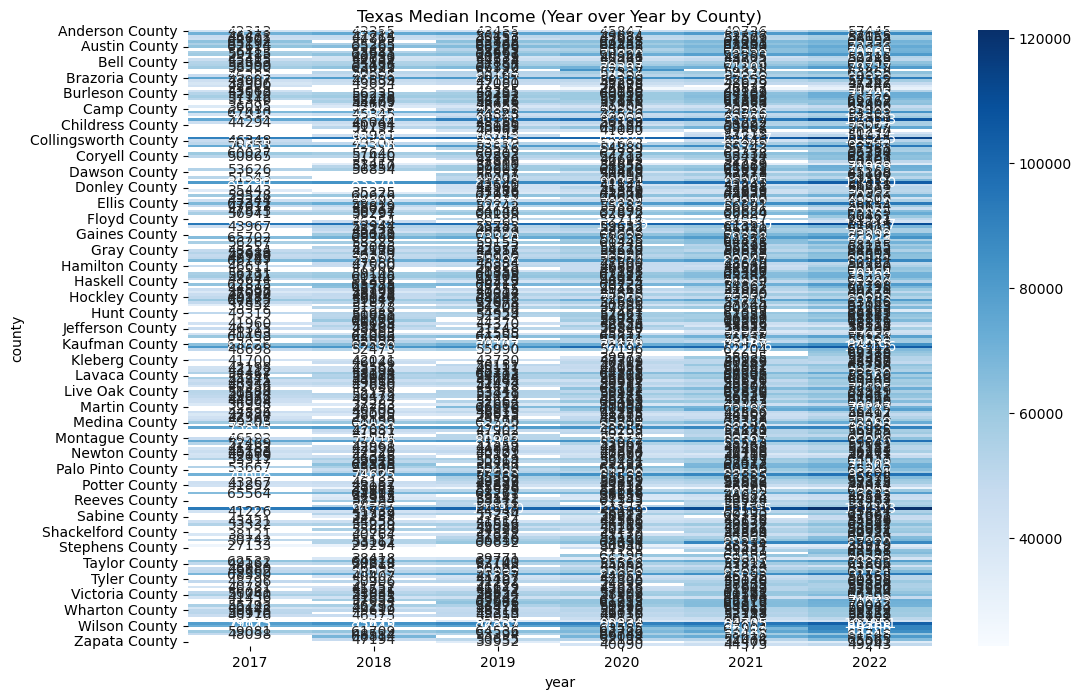

In [6]:
#Generate Heatmap to chart Median income by year per county
tx_income_pivot = tx_ev_df.pivot_table(index="county", columns="year", values= "median_income")
plt.figure(figsize=(12,8))
sns.heatmap(tx_income_pivot, cmap="Blues", annot=True, fmt=".0f")
plt.title("Texas Median Income (Year over Year by County)")
plt.show

In [7]:
# #Generate Heatmap to chart top 10 Median income by year per county

# #ca_income_sort = ca_ev_df.sort_values(by="median_income", ascending=False)

# #ca_df = ev_df[ev_df["state"] == "CA"].sort_values(["year","state","county"]).reset_index(drop=True)

# ca_top_10 = ca_ev_df[ca_ev_df["year"] == "2020"].sort_values(by="median_income", ascending=False)

# ca_income_10 = ca_top_10.head(10)

# ca_income_10

In [8]:
# fl_income_pivot = fl_ev_df.pivot_table(index="county", columns="year", values= "median_income")
# plt.figure(figsize=(12,8))
# sns.heatmap(fl_income_pivot, cmap="Blues", annot=True, fmt=".0f")
# plt.title("Florida Median Income (Year over Year by County)")
# plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

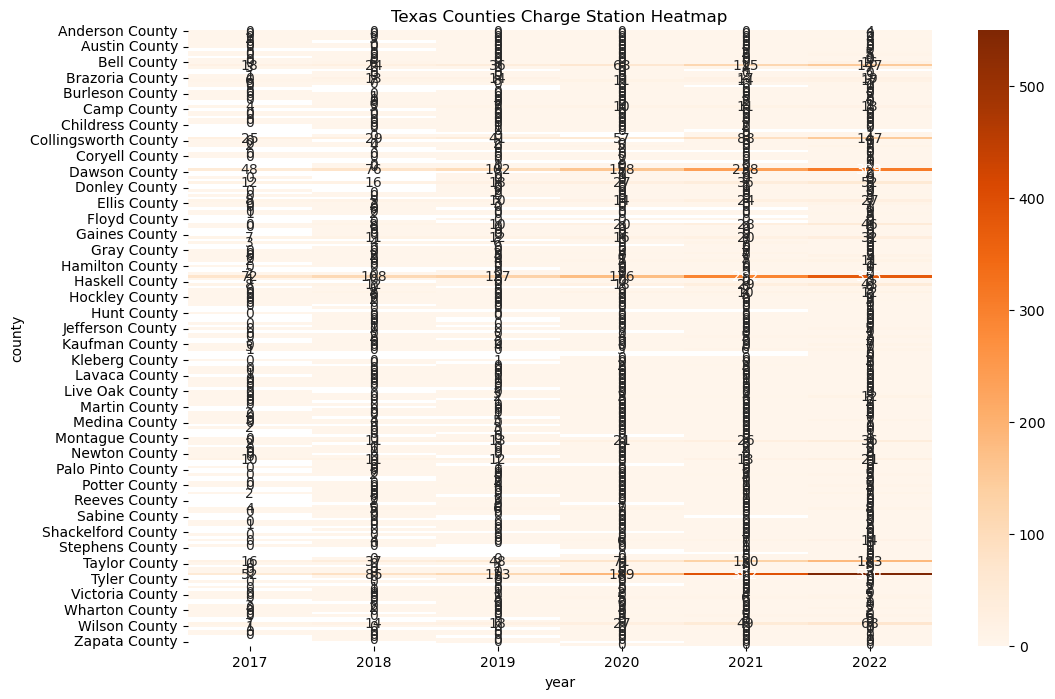

In [9]:
#Generate Heatmap to chart charging station infrastructure by year per county
tx_charge_pivot = tx_ev_df.pivot_table(index="county", columns="year", values= "cumulative_ev_stations")
plt.figure(figsize=(12,8))
sns.heatmap(tx_charge_pivot, cmap="Oranges", fmt=".0f") #removed annot=True
plt.title("Texas Counties Charge Station Heatmap")
plt.show